# Análise exploratória do DataSet Infrações de  Trânsito #
##### fonte dos dados:https://dados.gov.br/dataset/infracoes-transito #####
##### Consolidação de dados de Autos de Infração do mês de Setembro/2022 #####
## Autor: Geraldo Silva ## 

In [1]:
## Importando libs para trabalhar com dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#Lendo arquivo custo_diaria.csv fornecido pelo Professor Leandro Lessa

dataset = "~/gerFiles/dataUnimed/desafio/dados-abertosset2022.csv"
dados= pd.read_csv(dataset, header=None, sep = ";")


In [3]:
#lendo informações 
#imprimindo informações basicas
def info_data_set(df):
    print("Imprimindo informações basicas do dataset\n\n")
    df.info(verbose = True)
    
info_data_set(dados)    

Imprimindo informações basicas do dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108287 entries, 0 to 108286
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       108287 non-null  object
 1   1       108287 non-null  object
 2   2       108287 non-null  object
 3   3       108287 non-null  object
 4   4       108287 non-null  object
 5   5       108287 non-null  object
 6   6       108281 non-null  object
 7   7       17818 non-null   object
 8   8       17509 non-null   object
 9   9       2123 non-null    object
 10  10      17709 non-null   object
 11  11      17709 non-null   object
 12  12      108287 non-null  object
dtypes: object(13)
memory usage: 10.7+ MB


In [4]:
#Usando o metodo describe para obter estatísticas resumidas dos dados 
dados.describe()
#dados.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,108287,108287,108287,108287,108287,108287,108281,17818,17509,2123,17709,17709,108287
unique,137,137,4,48,31,1441,449,85,37,172,9729,9914,5
top,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,12/09/2022,17:35,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",13,Sentido Crescente,TRECHO DA VIA EM FRENTE AO CONDOMÍNIO SOLAR DA...,0.0,0.0,Média
freq,67733,67733,105201,36035,5052,166,6403,1782,9331,253,2765,2765,71660


In [5]:
# imprimindo as primeiras linhas do dataframe
dados.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
1,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/09/2022,00:00,"RODOVIA DF-079 (EPVP), KM 2,7",NaN,NaN,NaN,NaN,NaN,Média
2,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/09/2022,00:01,"BR-020 KM 19,1 SENTIDO CRESCENTE ...",NaN,NaN,NaN,NaN,NaN,Média
3,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,MOTOCICLET,01/09/2022,00:01,"DF-075 (EPNB) KM 4,4 SENT. N. BAND. / RIACHO F...",NaN,NaN,NaN,NaN,NaN,Leve
4,7463-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/09/2022,00:02,"RODOVIA DF-001 (EPCT), KM 60,7",NaN,NaN,NaN,NaN,NaN,Grave


In [6]:
# definido função para Vericando valores null
def func_valores_null(df):
    valoresNull = pd.isnull(df)
    #print(valoresNull)
    print("Verificando valores null")
    print("------------------------") 
    print(valoresNull.where(valoresNull == True).count())
    
func_valores_null(dados)

Verificando valores null
------------------------
0          0
1          0
2          0
3          0
4          0
5          0
6          6
7      90469
8      90778
9     106164
10     90578
11     90578
12         0
dtype: int64


In [33]:
# Gerando novo dataframe com colunas, tipo_infrator, tipo_veiculo e grav_tipo  
# Lista com colunas que não seram utilizadas
#list_infrator_veiculo_gravidade = ['tipo_infracao', 'descricao', 'tipo_infrator', 'tipo_veiculo', 'cometimento', 'hora_cometimento', 'auinf_local_rodovia', 'auinf_local_km', 'auinf_local_referencia', 'auinf_local_complemento', 'auinf_local_latitude', 'auinf_local_longitude']
list_infrator_veiculo_gravidade = [ 0 , 1, 4, 5, 6, 7, 8, 9, 10, 11]
dados_infrator_veiculo_gravidade= dados.drop(list_infrator_veiculo_gravidade, axis = 1).drop(list_infrator_veiculo_gravidade, axis = 0)
dados_infrator_veiculo_gravidade.columns = ['tipo_infrator', 'tipo_veiculo', 'tipo_gravidade']
dados_infrator_veiculo_gravidade.head(4)


,tipo_infrator,tipo_veiculo,tipo_gravidade
2,Condutor,AUTOMOVEL,Média
3,Condutor,MOTOCICLET,Leve
12,Condutor,Automóvel,Gravíssima
13,Condutor,AUTOMOVEL,Média


In [37]:
#Imprimindo informações basicas dados
dados_infrator_veiculo_gravidade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108277 entries, 2 to 108286
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tipo_infrator   108277 non-null  object
 1   tipo_veiculo    108277 non-null  object
 2   tipo_gravidade  108277 non-null  object
dtypes: object(3)
memory usage: 7.3+ MB


In [38]:
#Verificando dados ausentes
func_valores_null(dados_infrator_veiculo_gravidade)

Verificando valores null
------------------------
tipo_infrator     0
tipo_veiculo      0
tipo_gravidade    0
dtype: int64


In [39]:
dados_infrator_veiculo_gravidade.describe(include = 'all')

,tipo_infrator,tipo_veiculo,tipo_gravidade
count,108277,108277,108277
unique,3,47,4
top,Condutor,AUTOMOVEL,Média
freq,105192,36033,71652


Condutor        105192
Proprietário      3083
Emb/Transp           2
Name: tipo_infrator, dtype: int64

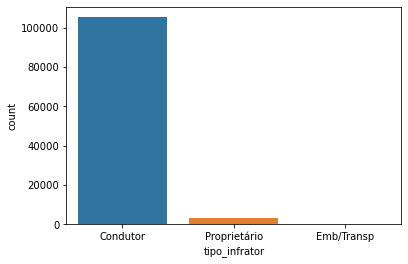

In [59]:
#Plotando gráficos e visualizando estatíticas 
#plt.subplot(131)
#plt.bar(dados_infrator_veiculo_gravidade[3],[1, 1000, 200000])
#dados_infrator_veiculo_gravidade.plot(kind = 'scatter', x = 2, y = 3)
#plt.show()
sns.countplot(x =dados_infrator_veiculo_gravidade['tipo_infrator'], data = dados_infrator_veiculo_gravidade)
dados_infrator_veiculo_gravidade['tipo_infrator'].value_counts()


In [75]:
#sns.countplot(x =dados_infrator_veiculo_gravidade['tipo_veiculo'] , data = dados_infrator_veiculo_gravidade)
dados_infrator_veiculo_gravidade['tipo_veiculo'].value_counts()

AUTOMOVEL                    36033
AUTOMOVEL                    24329
Automóvel                    12906
CAMINHONET                    5738
MOTOCICLETA                   3929
CAMIONETA                     3701
CAMINHONETE                   3607
CAMIONETA                     2576
UTILITARIO                    2535
MOTOCICLET                    1896
Caminhonete                   1652
CAMINHAO                      1496
UTILITARIO                    1315
Motocicleta                   1230
S.REBOQUE                     1107
Camioneta                      901
CAMINHAO                       793
Utilitário                     423
Caminhão Trator                339
MOTONETA                       214
CAMINHAO TRATOR                176
Caminhão                       164
ONIBUS                         149
MOTONETA                       140
MICROONIBUS                    123
MICROONIBU                     110
ONIBUS                         109
REBOQUE                        101
SEMI-REBOQUE        

Média         71652
Leve          16476
Grave         15689
Gravíssima     4460
Name: tipo_gravidade, dtype: int64

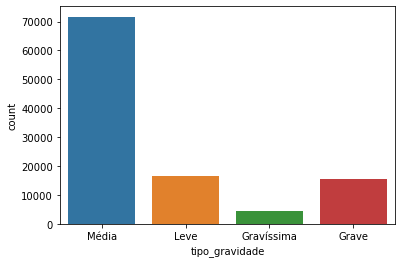

In [64]:
sns.countplot(x =dados_infrator_veiculo_gravidade['tipo_gravidade'], data = dados_infrator_veiculo_gravidade)
dados_infrator_veiculo_gravidade['tipo_gravidade'].value_counts()

### ToDo: ###